<a href="https://colab.research.google.com/github/ilman79/Chapter2-Binary/blob/main/Challenge_ChapterII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library & Data

In [ ]:
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv(url, names=names)

In [ ]:
df.head()
### Diabetes = 1, Tidak Diabetes = 0

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Split target variable

In [ ]:
## Define Feature X and Y
Y = df['class']
X = df.drop(['class'],axis=1) ## Drop feature Y
# X = df[["preg","plas","pres","skin","test","mass","pedi"	,"age"]] ## Define satu2

In [ ]:
### Proportion of Y/Target Variable
print("absolute_proportion")
display(Y.value_counts())
print()
print("percentage_proportion")
display(Y.value_counts()/len(df))

absolute_proportion


0    500
1    268
Name: class, dtype: int64


percentage_proportion


0    0.651042
1    0.348958
Name: class, dtype: float64

# Data / Feature Preprocessing

# Feature Selection

# Select best K

In [ ]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
X

,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
X_new = SelectKBest(chi2, k=2).fit_transform(X, Y)
X_new.shape

(768, 2)

In [ ]:
X_new
## Selected Feature : plast & test

array([[148.,   0.],
       [ 85.,   0.],
       [183.,   0.],
       ...,
       [121., 112.],
       [126.,   0.],
       [ 93.,   0.]])

In [ ]:
df[["plas","class"]].groupby("class").mean()

,plas
class,
0,109.980000
1,141.257463


In [ ]:
df[["test","class"]].groupby("class").mean()

,test
class,
0,68.792000
1,100.335821


In [ ]:
df[["preg","class"]].groupby("class").mean()

,preg
class,
0,3.298000
1,4.865672


In [ ]:
df[["mass","class"]].groupby("class").mean()

,mass
class,
0,30.304200
1,35.142537


<Axes: ylabel='plas'>

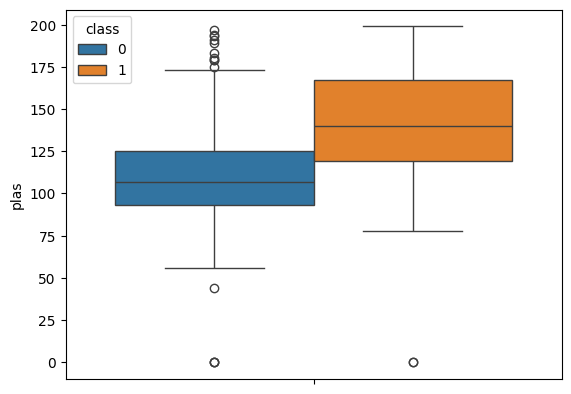

In [ ]:
import seaborn as sns
sns.boxplot(y="plas",hue="class",data=df)

<Axes: ylabel='mass'>

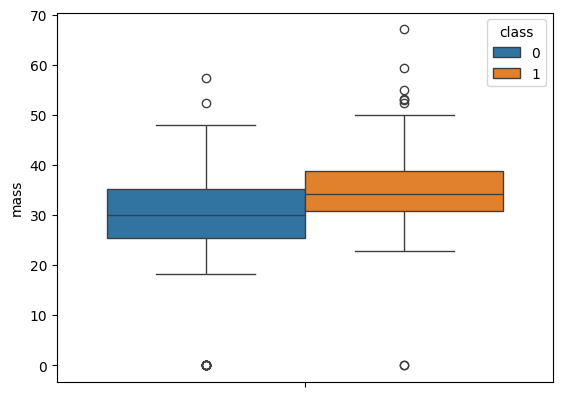

In [ ]:
import seaborn as sns
sns.boxplot(y="mass",hue="class",data=df)

In [ ]:
str(X["mass"].dtype)

'float64'

Boxplot for feature: preg


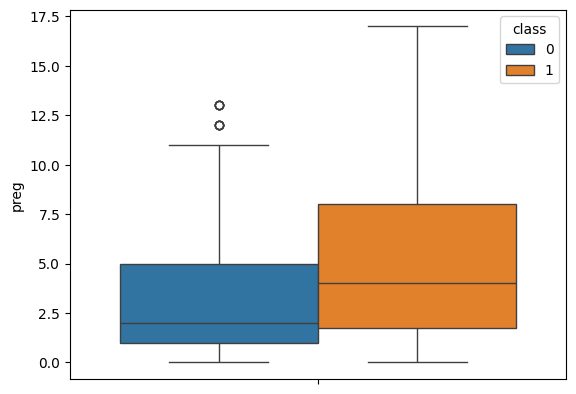


Boxplot for feature: plas


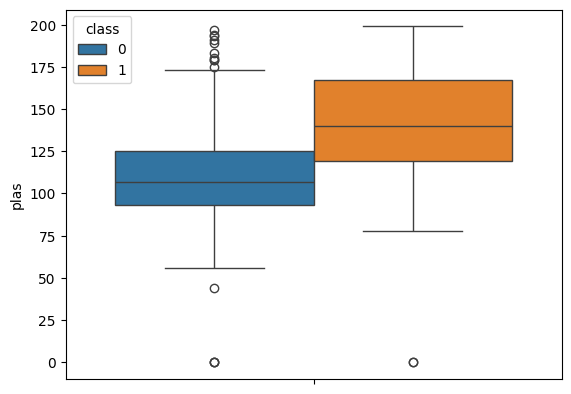


Boxplot for feature: pres


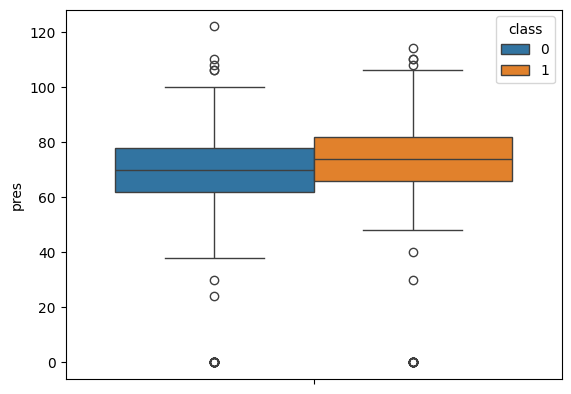


Boxplot for feature: skin


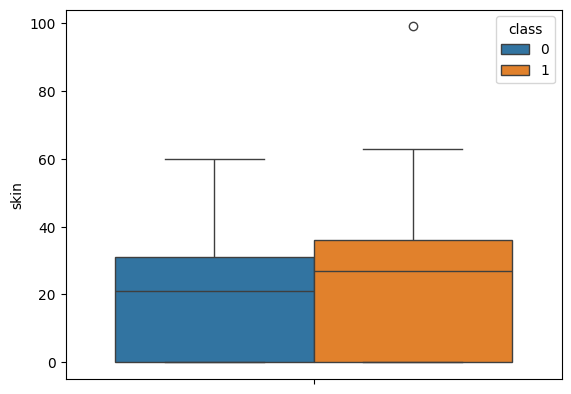


Boxplot for feature: test


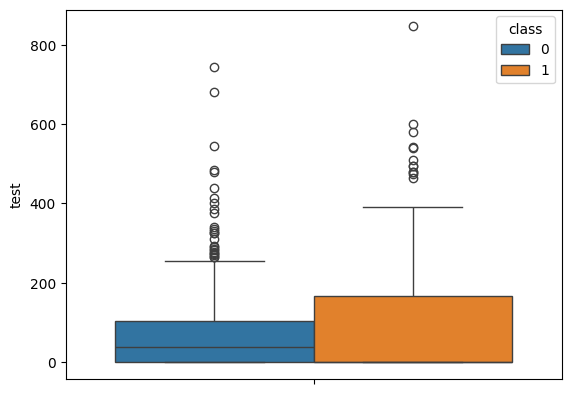


Boxplot for feature: mass


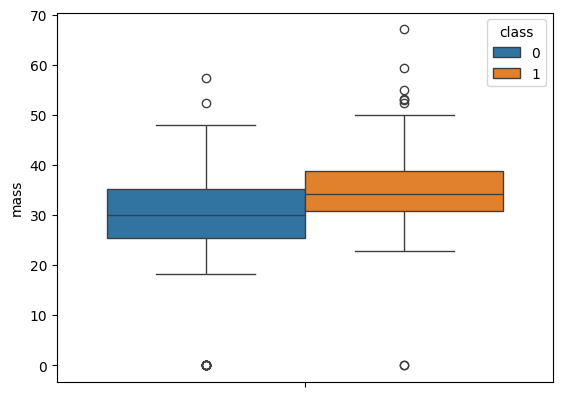


Boxplot for feature: pedi


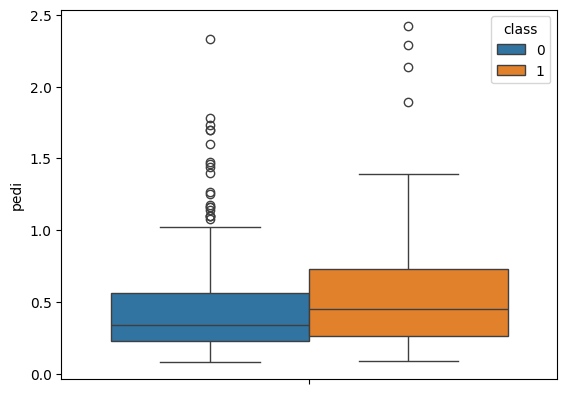


Boxplot for feature: age


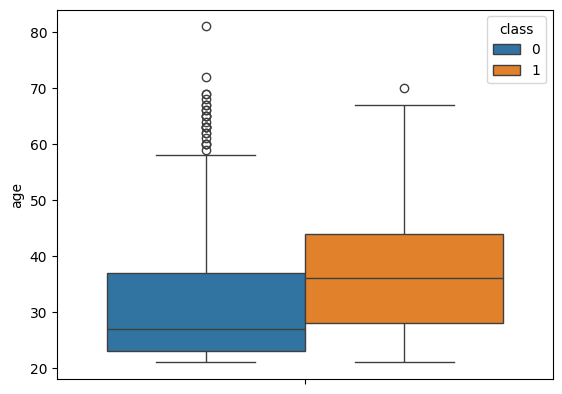

In [ ]:
import matplotlib.pyplot as plt

for col in X.columns:
  if str(df[col].dtype) != "object":
    print("Boxplot for feature:",col)
    sns.boxplot(y=col,hue="class",data=df)
    plt.show()
    print()

# Train Test Split

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

test_size = 0.33
seed = 123
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,
                                                                    Y,
                                                                    test_size=test_size,
                                                                    random_state=seed,
                                                                    stratify = Y)

In [ ]:
print("Data Train:",X_train.shape, Y_train.shape)
print("Data Test:",X_test.shape, Y_test.shape)

Data Train: (514, 8) (514,)
Data Test: (254, 8) (254,)


# Model

In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test) ## model.score return accuracy
result

0.7598425196850394

## MODEL KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=9)
model_knn.fit(X_train, Y_train)
result = model_knn.score(X_test, Y_test) ## model.score return accuracy
result

0.7559055118110236

## Model Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(max_depth=5)
model_dt.fit(X_train, Y_train)
result = model_dt.score(X_test, Y_test) ## model.score return accuracy
result

0.7283464566929134

In [ ]:
## XGBOOST LGBM CATBOOST SVM LDA QDA |TABNET

# Evaluation

In [ ]:
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 75.984%


In [ ]:
model

LogisticRegression()

# Other Metrics

In [ ]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]

In [ ]:
# y_pred

In [ ]:
# y_pred_proba

## AUC

In [ ]:
from sklearn.metrics import roc_auc_score

result1 = roc_auc_score(Y_test,y_pred_proba)
print("AUC of ROC: %.3f%%" % (result1*100.0))

AUC of ROC: 85.564%


## f-1 score

In [ ]:
from sklearn.metrics import f1_score

result2 = f1_score(Y_test,y_pred)
print("F1 Score: %.3f%%" % (result2*100.0))

F1 Score: 62.112%


## Log-loss

In [ ]:
from sklearn.metrics import log_loss

result3 = log_loss(Y_test,y_pred_proba)
print("Log-loss: %.3f" % (result3))

Log-loss: 0.460


# Model Validation

## k-fold Validation

### Accuracy

In [ ]:
seed = 42
kfold = model_selection.KFold(n_splits=10, shuffle = True, random_state=seed)
model = LogisticRegression()
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 77.599% (6.137%)


### AUC

In [ ]:
kfold = model_selection.KFold(n_splits=10,shuffle = True, random_state=seed)
model = LogisticRegression()
results = model_selection.cross_val_score(model, X, Y, cv=kfold,scoring='roc_auc')
print("ROC AUC: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

ROC AUC: 82.667% (4.521%)


## Leave one out cross-validation

### Accuracy

In [ ]:
# results

In [ ]:
loocv = model_selection.LeaveOneOut()
model = LogisticRegression()
results = model_selection.cross_val_score(model, X, Y, cv=loocv,scoring='accuracy')
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 77.865% (41.516%)


## Repeated Train-Test Split

### Accuracy

In [ ]:
repeatedcv = model_selection.ShuffleSplit(n_splits=10, test_size=test_size, random_state=seed)
model = LogisticRegression()
results = model_selection.cross_val_score(model, X, Y, cv=repeatedcv,scoring='accuracy')
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 77.874% (3.084%)


In [ ]:
results

array([0.7480315 , 0.80314961, 0.75590551, 0.78346457, 0.77559055,
       0.79527559, 0.78346457, 0.71259843, 0.80708661, 0.82283465])

### AUC

In [ ]:
repeatedcv = model_selection.ShuffleSplit(n_splits=10, test_size=test_size, random_state=seed)
model = LogisticRegression()
results = model_selection.cross_val_score(model, X, Y, cv=repeatedcv,scoring='roc_auc')
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 83.156% (3.752%)


# Grid Search CV

In [ ]:
params = {'C':[0.01,0.05,0.1,0.5,0.7,1,2,3]}

In [ ]:
kfold = model_selection.StratifiedKFold(n_splits = 5,shuffle = True,random_state = seed)
grid = model_selection.GridSearchCV(model,param_grid = params, scoring = 'roc_auc',cv = kfold)

In [ ]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 0.7, 1, 2, 3]},
             scoring='roc_auc')

In [ ]:
grid.best_score_

0.8151457000710731

In [ ]:
grid.best_params_

{'C': 0.05}